<a href="https://colab.research.google.com/github/Harishankarvel/LAUN_ML_project/blob/main/K_nearest_neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First, use K-Means to analyze your data and create the player role clusters then, I used those clusters as labels to train a KNN model. This new KNN model can then be used to instantly classify any new player into one of the roles you discovered.

Dataset 'ODI data.csv' loaded successfully.
Analyzing 812 players with at least 30 matches.

--- Step 1: Using K-Means to Create Role Clusters ---
K-Means clustering complete. Player roles have been assigned.


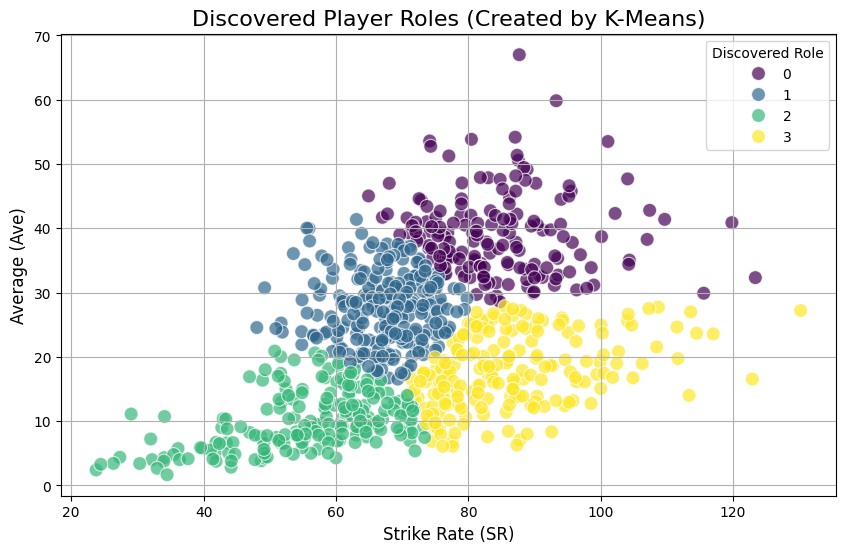


--- Step 2: Using KNN to Predict the Roles We Just Created ---

KNN Model Accuracy: 97.13%


In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Data Loading and Cleaning ---
try:
    player_stats = pd.read_csv('ODI data.csv', index_col=0)
    print("Dataset 'ODI data.csv' loaded successfully.")
except FileNotFoundError:
    print("ERROR: 'ODI data.csv' not found. Please upload the file to your Colab session.")
    exit()

features_df = player_stats[['Player', 'Mat', 'Ave', 'SR']].copy()
features_df['Ave'] = pd.to_numeric(features_df['Ave'], errors='coerce')
features_df['SR'] = pd.to_numeric(features_df['SR'], errors='coerce')
features_df['Mat'] = pd.to_numeric(features_df['Mat'], errors='coerce')
features_df.dropna(subset=['Ave', 'SR', 'Mat'], inplace=True)
features_df = features_df[features_df['Mat'] >= 30].copy()
print(f"Analyzing {len(features_df)} players with at least 30 matches.")

# --- 2. Scaling the Data ---
features_for_scaling = features_df[['Ave', 'SR']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_scaling)

# --- 3. (STEP 1) Use K-Means to DISCOVER Player Roles ---
print("\n--- Step 1: Using K-Means to Create Role Clusters ---")
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
# Create the 'Role' column (our label) using K-Means
features_df['Role'] = kmeans.fit_predict(scaled_features)

print("K-Means clustering complete. Player roles have been assigned.")

# Visualize the K-Means clusters (as we did before)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SR', y='Ave', hue='Role', data=features_df, palette='viridis', s=100, alpha=0.7)
plt.title('Discovered Player Roles (Created by K-Means)', fontsize=16)
plt.xlabel('Strike Rate (SR)', fontsize=12)
plt.ylabel('Average (Ave)', fontsize=12)
plt.legend(title='Discovered Role')
plt.grid(True)
plt.show()

# --- 4. (STEP 2) Use KNN to PREDICT Player Roles ---
print("\n--- Step 2: Using KNN to Predict the Roles We Just Created ---")

# Prepare the data for KNN (Supervised Learning)
X = scaled_features  # The player stats (Ave, SR)
y = features_df['Role'] # The 'Role' label we just created with K-Means

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize the KNN classifier
# We'll look at the 5 nearest neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model on the training data
knn_model.fit(X_train, y_train)


y_pred = knn_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"\nKNN Model Accuracy: {accuracy:.2%}")
